In [12]:
import phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, SequentialFeatureSelector

from tabulate import tabulate
from warnings import filterwarnings
filterwarnings("ignore")

In [13]:
x_data_generated, y_data_generated = make_classification(scale=1, random_state=0)

In [14]:
df = pd.DataFrame(data=x_data_generated)
df["Label"] = y_data_generated
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Label
0,-0.039268,0.131912,-0.211206,-1.214147,1.050045,-0.421328,0.768771,0.875696,2.451230,-0.480242,...,-0.523251,0.708695,-1.980566,-1.365163,-0.948933,1.947099,1.976989,1.021225,-0.469311,0
1,0.774161,0.104907,-0.332812,-1.270350,0.379113,-0.822828,-0.612626,1.496140,0.568459,-0.467493,...,-0.862493,-0.631192,0.133913,-0.972403,-0.774459,1.346221,1.267804,0.622519,-1.490265,0
2,-0.014858,0.670570,-0.214167,0.250202,0.055489,-1.566995,0.039767,0.265688,1.849591,0.719984,...,-1.102906,0.019279,-0.707506,0.723100,0.821406,0.024612,-0.104862,-0.101697,-0.451303,1
3,0.038909,-1.557999,-0.024549,0.216543,0.065274,-0.675594,0.844996,2.042072,-1.102230,-1.692370,...,0.729346,-0.298760,-0.507035,0.038118,0.626564,-0.578918,-0.071560,0.699136,-0.993361,1
4,0.936446,1.265078,-0.510293,-0.683049,-1.127849,0.679975,-0.704921,-0.290397,-0.386871,-0.803141,...,-0.464338,-0.552541,0.211497,1.327783,-0.035095,-0.101281,-0.800221,1.021791,-0.696327,1


In [15]:
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
Label    0
dtype: int64

<Figure size 1200x1000 with 0 Axes>

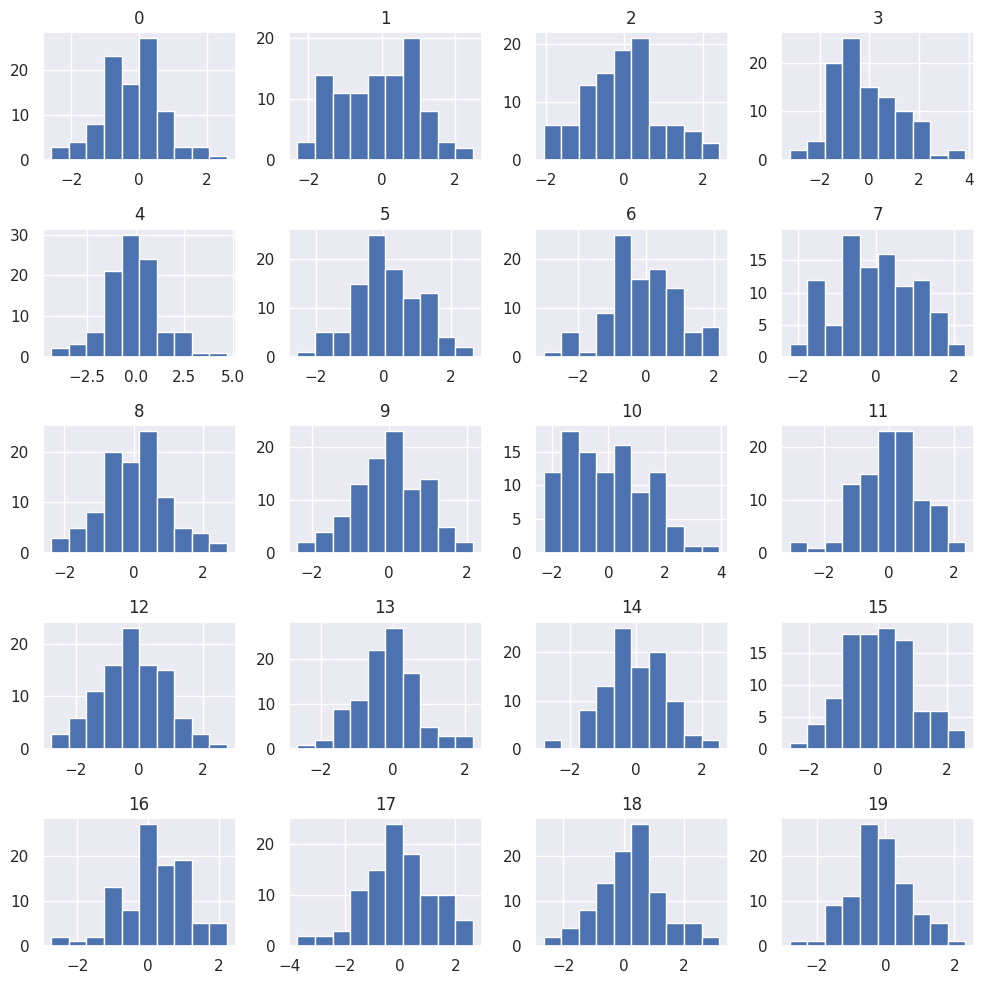

In [16]:
sns.set_theme()
plt.figure(figsize=(12, 10))
fig, axs = plt.subplots(5, 4, figsize=(10, 10))
df.drop(columns="Label").hist(ax=axs)
plt.tight_layout()
plt.show()

<Axes: >

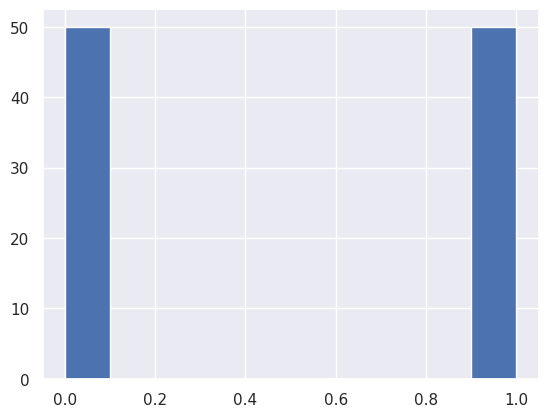

In [17]:
df["Label"].hist()

In [18]:
X = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
y = df["Label"]
X.shape

(100, 20)

In [19]:
def get_logistic_metric(X, y, model):
    cross_val_mean = round(cross_val_score(model, X, y, scoring='accuracy').mean(), 2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = round(f1_score(y_pred=y_pred, y_true=y_test), 2)
    precision = round(precision_score(y_pred=y_pred, y_true=y_test), 2)
    recall = round(recall_score(y_pred=y_pred, y_true=y_test), 2)

    results = [
        ["Cross-Val", cross_val_mean],
        ["F1-Score", f1],
        ["Precision", precision],
        ["Recall", recall]
    ]
    print(tabulate(results, headers=["Metric", "Score"], tablefmt="pretty"))

In [20]:
get_logistic_metric(X, y, LogisticRegression(random_state=0))

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Cross-Val | 0.81  |
| F1-Score  |  0.9  |
| Precision |  1.0  |
|  Recall   | 0.82  |
+-----------+-------+


### Признаки на основе матрицы корреляции

interval columns not set, guessing: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 'Label']


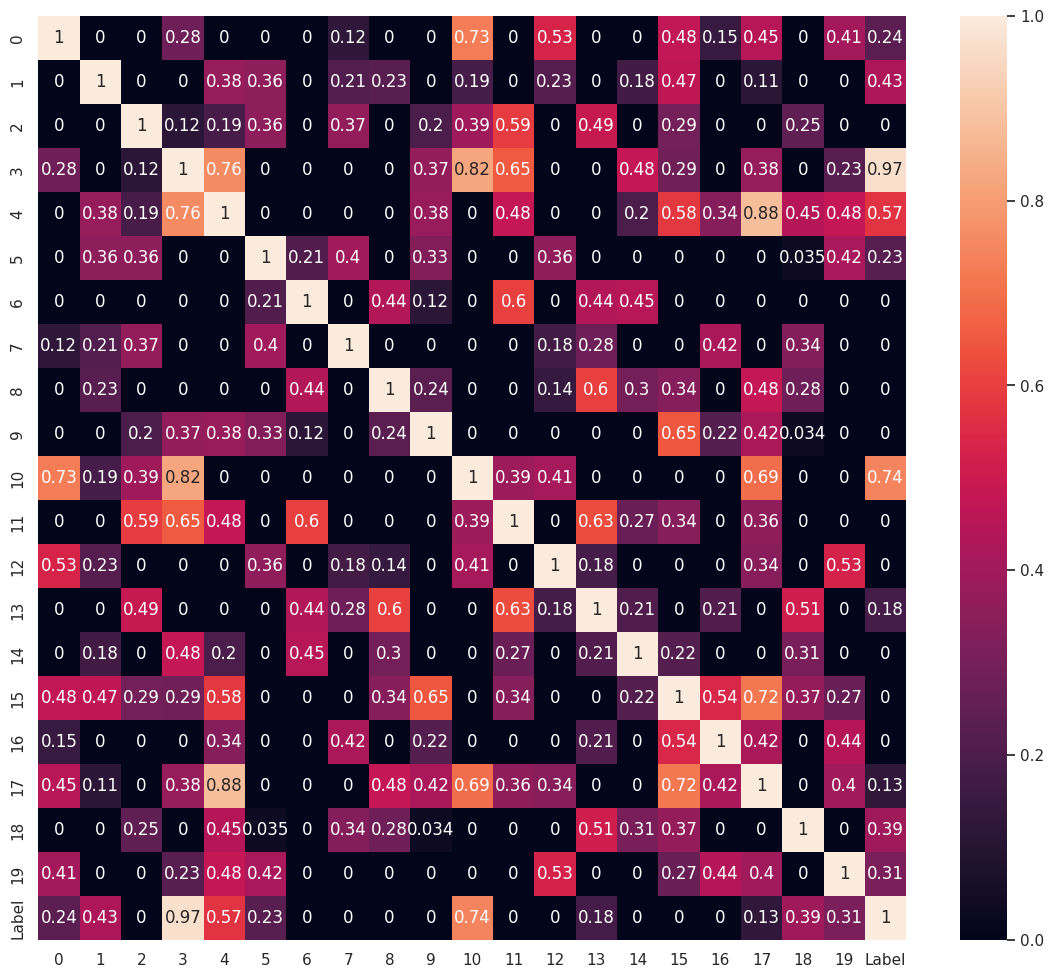

In [21]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.phik_matrix(), annot=True)
plt.show()

In [24]:
X = df[[1, 3, 4, 10]]
y = df["Label"]
get_logistic_metric(X, y, model=LogisticRegression(random_state=0))

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Cross-Val | 0.93  |
| F1-Score  |  0.9  |
| Precision |  1.0  |
|  Recall   | 0.82  |
+-----------+-------+


### Признаки на основе дисперсионного анализа


In [25]:
X = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
y = df["Label"]
X.shape

(100, 20)

In [26]:
X_new = SelectKBest(f_classif, k=5)
X_new = X_new.fit_transform(X, y)
X_new.shape

(100, 5)

In [27]:
get_logistic_metric(X_new, y, LogisticRegression(random_state=0))

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Cross-Val | 0.91  |
| F1-Score  |  0.9  |
| Precision |  1.0  |
|  Recall   | 0.82  |
+-----------+-------+


### Отбор с использованием моделей

In [28]:
X = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
y = df["Label"]

LogisticRegression

In [29]:
selector = SelectFromModel(estimator=LogisticRegression())
selector.fit(X, y)
selector.estimator_.coef_

array([[ 0.85062099,  0.46768314, -0.00618767,  1.69208007,  1.29070381,
        -0.00359469,  0.15125559,  0.06778549,  0.19794456, -0.59088377,
         1.32760062,  0.41265334,  0.05060472,  0.25419228,  0.26517846,
        -0.0491259 ,  0.38364722,  0.30952893,  0.19207726, -0.4762508 ]])

In [30]:
X = selector.transform(X)
get_logistic_metric(X, y, LogisticRegression(random_state=0, penalty='l1', solver='liblinear'))

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Cross-Val | 0.89  |
| F1-Score  | 0.84  |
| Precision |  1.0  |
|  Recall   | 0.73  |
+-----------+-------+


RandomForest

In [31]:
X = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
y = df["Label"]

In [ ]:
rf_clf = RandomForestClassifier()
params = {
    "max_depth": range(1, 11),
    "min_samples_split": range(5, 11),
    "min_samples_leaf": range(1, 7),
}

gscv = GridSearchCV(
    estimator=rf_clf,
    param_grid=params,
    cv=5
).fit(X, y)
gscv.best_params_

{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [32]:
selector = SelectFromModel(estimator=RandomForestClassifier(random_state=0, max_depth=1, min_samples_leaf=2, min_samples_split=10))
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(max_depth=1,
                                                 min_samples_leaf=2,
                                                 min_samples_split=10,
                                                 random_state=0))

In [33]:
X = selector.transform(X)
get_logistic_metric(X, y, LogisticRegression(random_state=0, penalty='l1', solver='liblinear'))

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Cross-Val | 0.91  |
| F1-Score  |  0.9  |
| Precision |  1.0  |
|  Recall   | 0.82  |
+-----------+-------+


(100, 6)

### Перебор признаков

In [34]:
X = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
y = df["Label"]

In [35]:
feat_selector = SequentialFeatureSelector(
    estimator=LogisticRegression(),
    n_features_to_select=5,
    direction="forward",
    scoring="recall"

).fit(X, y)
feat_selector.get_support()


array([ True,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False])

In [36]:
X = feat_selector.transform(X)
X.shape

(100, 5)

In [37]:
get_logistic_metric(X, y, LogisticRegression(random_state=0))

+-----------+-------+
|  Metric   | Score |
+-----------+-------+
| Cross-Val | 0.93  |
| F1-Score  | 0.95  |
| Precision |  1.0  |
|  Recall   | 0.91  |
+-----------+-------+


# Выводы

Выбор признаков сильно зависит от размерности данных. Я бы выделил 2 прикладных решения:
1. На основе матрицы корреляции, руками. Посмотреть признаки самому, найти определенные закономерности. Вариант уместен при адекватном количестве признаков 
2. SequentialFeatureSelector. Перебор признаков. Круто, что можно задать, с какого направления будем идти (прямой / обратный выбор) `direction`, и можно выбрать метрику, которую нужно максимизировать в зависимости от задачи `scoring`.

В данной задаче оба решения показали себя почти одинаково + лучше других подходов

Сравнительная таблица:

| № | Выбора признаков | Количество признаков | Cross-Val | F1-Score | Precision | Recall |
|---|------------------|----------------------|-----------|----------|-----------|--------|
| 1 |  Все признаки    | 19                   |0.81       |0.9       |1.0        |0.82    |
| 2 |  Признаки на основе матрицы корреляции  | 4                   |0.93       |0.9       |1.0        |0.82    |
| 3 |  Признаки на основе дисперсионного анализа    | 5                   |0.91       |0.9       |1.0        |0.82    |
| 4 |  Отбор с использованием моделей    | 6                   |0.89       |0.84       |1.0        |0.73    |
| 5 |  Перебор признаков    | 5                   |0.93       |0.95       |1.0        |0.91    |